Esse notebook fará uma analise estatísticas da NBA. Tentarei deixar tudo de forma mais clara possível para que seja fácil replicar e melhorá-lo.

Bom, esse notebook será estruturado de tal forma:
1. Web Scrapping dos dados
2. Tratamento dos dados
3. Visualização dos dados

Esses dados serão baixados do site [basketball-reference](https://www.basketball-reference.com/), onde pegaremos dados entre 1950 e 2020. Não considerarei a temporada atual (2020-2021) pois a mesma ainda está em andamento, porém se você utilizar esse notebook após a temporada 2020-2021, atualize os dados para ter uma melhor visualização da realidade, pois estou fazendo esse notebook em maio de 2021. Esse notebook tem a intenção de analisar os números das temporadas gerais e individuais de forma que possamos descobrir tendências para a NBA e comparar com o passado para analisar mudanças.

Primeiro importaremos as bibliotecas utilizadas nesse notebook.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

Criaremos uma função para baixar os dados do site [basketball-reference](https://www.basketball-reference.com/) e salvar os dados em nossa máquina, de forma há não precisarmos rodar essa célula sempre e quando precisarmos baixar novos dados, podemos apenas baixar os dados referente ao ano que quisermos.

In [2]:
def web_scrapping_nba(base_url, ano_inicio, ano_fim):
    anos = range(ano_inicio, ano_fim + 1, 1)
    
    for ano in anos:
        req_url = base_url.format(ano)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id': 'totals_stats'})
        df = pd.read_html(str(table))[0]
        # criando uma coluna com os anos
        df['Year'] = ano
        df.to_csv(f'./dados/nba_{ano}.csv')

Usando a função para baixar os dados.

In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'

dados = web_scrapping_nba(url, 1950, 2020)

Bom, após criar a função que baixa e salva os arquivos em nossa máquina, devemos importar esses arquivos para podermos usá-los. Criaremos uma função para isso.

In [4]:
def nba_carregamento(ano_inicio, ano_fim):
    anos = range(ano_inicio, ano_fim + 1, 1)
    dados_finais = pd.DataFrame()

    for ano in anos:
        dados = pd.read_csv(f'./dados/nba_{ano}.csv')
        dados_finais = dados_finais.append(dados)
    return dados_finais

In [5]:
dados = nba_carregamento(1950, 2020)
dados

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,144,...,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,1950
1,1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,102,...,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,1950
2,2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,174,...,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,1950
3,3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,22,...,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,1950
4,4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,21,...,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,672,525,Trae Young,PG,21,ATL,60,60,2120,546,...,32,223,255,560,65,8,289,104,1778,2020
673,673,526,Cody Zeller,C,27,CHO,58,39,1341,251,...,160,251,411,88,40,25,75,140,642,2020
674,674,527,Tyler Zeller,C,30,SAS,2,0,4,1,...,3,1,4,0,0,0,0,0,2,2020
675,675,528,Ante Žižić,C,23,CLE,22,0,221,41,...,18,48,66,6,7,5,10,27,96,2020


Temos uma coluna `Rk` que repete é uma forma de índice do site. Vamos colocar essa coluna no índice.

In [6]:
dados.index = dados['Rk']
dados

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Rk,,,,,,,,,,,,,,,,,,,,,
1,0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,144,...,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,1950
2,1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,102,...,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,1950
3,2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,174,...,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,1950
4,3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,22,...,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,1950
4,4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,21,...,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,672,525,Trae Young,PG,21,ATL,60,60,2120,546,...,32,223,255,560,65,8,289,104,1778,2020
526,673,526,Cody Zeller,C,27,CHO,58,39,1341,251,...,160,251,411,88,40,25,75,140,642,2020
527,674,527,Tyler Zeller,C,30,SAS,2,0,4,1,...,3,1,4,0,0,0,0,0,2,2020


Vendo o csv, vemos que há valores de `Rk` dentro da coluna Rk. Vamos excluir esses valores.

In [7]:
drop_indexes = dados[dados.index == 'Rk'].index
dados.drop(drop_indexes, inplace=True)

In [8]:
dados

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Rk,,,,,,,,,,,,,,,,,,,,,
1,0,1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,144,...,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,1950
2,1,2,Cliff Barker,SG,29,INO,49,NaN,NaN,102,...,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,1950
3,2,3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,174,...,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,1950
4,3,4,Ed Bartels,F,24,TOT,15,NaN,NaN,22,...,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,1950
4,4,4,Ed Bartels,F,24,DNN,13,NaN,NaN,21,...,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,672,525,Trae Young,PG,21,ATL,60,60,2120,546,...,32,223,255,560,65,8,289,104,1778,2020
526,673,526,Cody Zeller,C,27,CHO,58,39,1341,251,...,160,251,411,88,40,25,75,140,642,2020
527,674,527,Tyler Zeller,C,30,SAS,2,0,4,1,...,3,1,4,0,0,0,0,0,2,2020


Vamos remover as colunas `Unamed: 0` e `Rk`

In [9]:
dados = dados.drop(['Unnamed: 0', 'Rk'], axis=1)
dados

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Rk,,,,,,,,,,,,,,,,,,,,,
1,Curly Armstrong,G-F,31,FTW,63,NaN,NaN,144,516,.279,...,NaN,NaN,NaN,176,NaN,NaN,NaN,217,458,1950
2,Cliff Barker,SG,29,INO,49,NaN,NaN,102,274,.372,...,NaN,NaN,NaN,109,NaN,NaN,NaN,99,279,1950
3,Leo Barnhorst,SF,25,CHS,67,NaN,NaN,174,499,.349,...,NaN,NaN,NaN,140,NaN,NaN,NaN,192,438,1950
4,Ed Bartels,F,24,TOT,15,NaN,NaN,22,86,.256,...,NaN,NaN,NaN,20,NaN,NaN,NaN,29,63,1950
4,Ed Bartels,F,24,DNN,13,NaN,NaN,21,82,.256,...,NaN,NaN,NaN,20,NaN,NaN,NaN,27,59,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Trae Young,PG,21,ATL,60,60,2120,546,1249,.437,...,32,223,255,560,65,8,289,104,1778,2020
526,Cody Zeller,C,27,CHO,58,39,1341,251,479,.524,...,160,251,411,88,40,25,75,140,642,2020
527,Tyler Zeller,C,30,SAS,2,0,4,1,4,.250,...,3,1,4,0,0,0,0,0,2,2020


Vamos ver que tipos de dados há em nossos dados.

In [10]:
dados.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
Year       int64
dtype: object

Bom, vemos que todas os dados, tirando a única coluna criada por nós anteriormente (a coluna `Year`), são todos do tipo `object`. Vamos transforma todos os dados que são números em números.

In [11]:
# excluindo colunas que não são númericas
colunas_numericas = dados.columns.drop(['Player','Pos','Tm'])
dados[colunas_numericas] = dados[colunas_numericas].apply(pd.to_numeric)

Pronto, agora todos nossos dados estão da forma certa. Vemos como estão agora.

In [12]:
dados.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Year        int64
dtype: object

Vamos então dar uma olhada em nossos dados, agrupando pelos jogadores.

In [13]:
jogadores = dados.groupby('Player', as_index=False).sum()
maiores_pontuadores = jogadores.sort_values(by=['PTS'], axis=0, ascending=False)
maiores_pontuadores.head()

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2379,Kareem Abdul-Jabbar*,630,1560.0,625.0,57446.0,15837.0,28307.0,11.167,1.0,18.0,...,2975.0,9394.0,17440.0,5660.0,1160.0,3189.0,2527.0,4657.0,38387.0,39590
2381,Karl Malone*,589,1476.0,1471.0,54852.0,13528.0,26210.0,9.745,85.0,310.0,...,3562.0,11406.0,14968.0,5248.0,2085.0,1145.0,4524.0,4578.0,36928.0,37905
2619,LeBron James,459,1265.0,1264.0,48551.0,12481.0,24781.0,8.595,1875.0,5453.0,...,1509.0,7896.0,9405.0,9346.0,2015.0,957.0,4424.0,2325.0,34241.0,34204
4215,Wilt Chamberlain*,469,1118.0,0.0,51160.0,13744.0,25580.0,8.955,0.0,0.0,...,0.0,0.0,25597.0,4893.0,0.0,0.0,0.0,2221.0,33953.0,31461
2522,Kobe Bryant*,550,1346.0,1198.0,48637.0,11719.0,26200.0,8.828,1827.0,5546.0,...,1499.0,5548.0,7047.0,6306.0,1944.0,640.0,4010.0,3353.0,33643.0,40130


Temos muitos dados. Vamos ver quantas colunas possui nossos csv's

In [14]:
dados.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

Bom, já temos uma base de como nossos dados são, fizemos um breve tratamento. Agora vamos começar a analisá-los.

## Criando funções de plot

Para facilitar nosso trabalho, criaremos funções para plotar ao gráficos que repetiremos, de modo que não tenhamos que escrever o mesmo código várias vezes.

### Função gráfico duas imagens

Esse gráfico tem como principal função plotar gráficos das temporadas, pois como estamos falando de dados de 1950 até 2020, um plot só não daria conta. 

Vamos a função.

In [15]:
def grafico_duas_imagens(dados, legenda_x=None, legenda_y=None, titulo=None,
                         legenda_linha_media=None, legenda_barras=None,
                         cor='C0'):
    
    # cria a figura
    fig = plt.figure(figsize=(14, 12))
    
    # cria os eixos
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    # estilo do gráfico
    plt.style.use('seaborn')
    
    # gráfico do primeiro eixo
    dados[:35].plot(kind='bar', ax=ax1, xlabel=legenda_x, ylabel=legenda_y,
                    title=titulo, color=cor, label=legenda_barras)
    ax1.axhline(dados.mean(), color='red', label=legenda_linha_media)
    
    
    # gráfico do segundo eixo
    dados[35:].plot(kind='bar', ax=ax2, xlabel=legenda_x, ylabel=legenda_y,
                    color=cor, label=legenda_barras)
    ax2.axhline(dados.mean(), color='red', label=legenda_linha_media)
   
    # forçar legenda
    ax1.legend()
    ax2.legend()
    
    # plotar o gráfico
    plt.show()

### Função gráfico individual

Essa função tem como objetivo principal plotar gráficos para analise individual dos jogadores, pois teremos como parâmetro analisar apenas os dez maiores jogadores de cada fundamento.

In [16]:
def plot_grafico_barras(eixo_x, eixo_y, x_label='Jogadores', y_label='',
                        fonte_legenda=14, casas_decimais=2, cor_legenda_interna='black'):
    
    # cria a figura
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), constrained_layout=True)
    
    # gráfico
    sns.barplot(x=eixo_x.head(10), y=eixo_y.head(10))
    
    # legendas eixos
    ax.set_xlabel(x_label, fontsize=fonte_legenda)
    
    ax.set_ylabel(y_label, fontsize=fonte_legenda)
    plt.xticks(rotation=45)
    
    # condicional para plotar linha de média apenas em gráficos percentuais
    if casas_decimais != 0:
        media = ((eixo_y.head(100).sum()) / 100)
        ax.axhline(media, color='red', label='Média dos 100 primeiros')
    
    # colocar valores dentro dos gráficos
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        ax.text(x=x_value, y= 0.2 * y_value , s=f'{y_value:.{casas_decimais}f}',
                ha='center', va='bottom', rotation=0, color=cor_legenda_interna
                , weight='bold')
    
    # colocar legenda
    ax.legend()
    
    # plotar o gráfico
    plt.show()

## Função gráfico de regressão

Essa função tem como objetivo plotar linhas de regressão para os dados, para analisarmos tendências, vendo se há uma expectativa de crescimento ou não e tentando entender esses resultados.

In [17]:
def grafico_regressao(eixo_x, eixo_y, x_label='Ano', y_label='',
                        fonte_legenda=14, cor=None):
    
    # cria a figura
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7), constrained_layout=True)
    
    # gráfico
    sns.regplot(x=eixo_x, y=eixo_y, scatter=False, color=cor)
    
    # legendas eixos
    ax.set_xlabel(x_label, fontsize=fonte_legenda)
    
    ax.set_ylabel(y_label, fontsize=fonte_legenda)
    
    
    # plotar o gráfico
    plt.show()

Bom, as funções já estão criadas, vamos aos gráficos.

# Temporadas

Começaremos pelos gráficos das temporadas.

Vamos analisar os seguintes pontos.
1. Número de jogos médios por jogadores
2. Pontos por temporada médios por jogador
3. Pontos por temporada feitos de cestas de 3 pontos médios por jogador
4. Número de assistências médios por jogador
5. Número de bloqueios médios por jogador
6. Número de roubos de bola médios por jogador
7. Número de rebotes por jogador

## Jogos

Vamos comparar o número de jogos por média dos jogadores da NBA. No ano de 1950 haviam 68 jogos por time na temporada regular. Hoje (2021) o número é de 82 jogos por temporada, porém vale ressaltar que na temporada de 2020 houve menos jogos, 72 jogos, devido a pandemia de Covid-19.

In [18]:
jogos = dados.groupby('Year')['G'].mean()

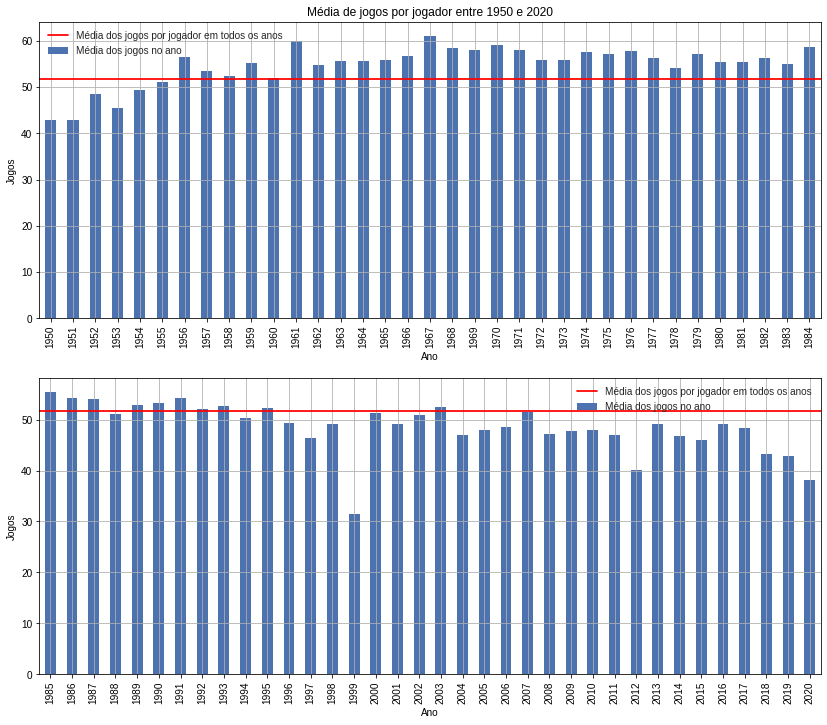

In [19]:
grafico_duas_imagens(jogos, legenda_x='Ano', legenda_y='Jogos',
                     legenda_linha_media='Média dos jogos por jogador em todos os anos',
                     titulo='Média de jogos por jogador entre 1950 e 2020',
                     legenda_barras='Média dos jogos no ano',
                     cor='C0')

Com os gráfico acima conseguimos ver que a uma tendência a diminuir o número de jogos nos últimos anos na NBA. Os últimos 13 anos há uma média de jogos por jogador menor do que os valor médio desses últimos 70 anos.

Podemos também ver que em 1999 foi o ano com a menor média. Isso se deve ao ano de 1999 de 56 jogos por equipe. O motivo desse baixo número de jogos foi ao segundo grande bloquio da história da NBA, que durou de 1º de julho de 1998 a 20 de janeiro de 1999.

Vamos analisar agora, para confirmarmos nossas suspeitas um gráfico de regressão.

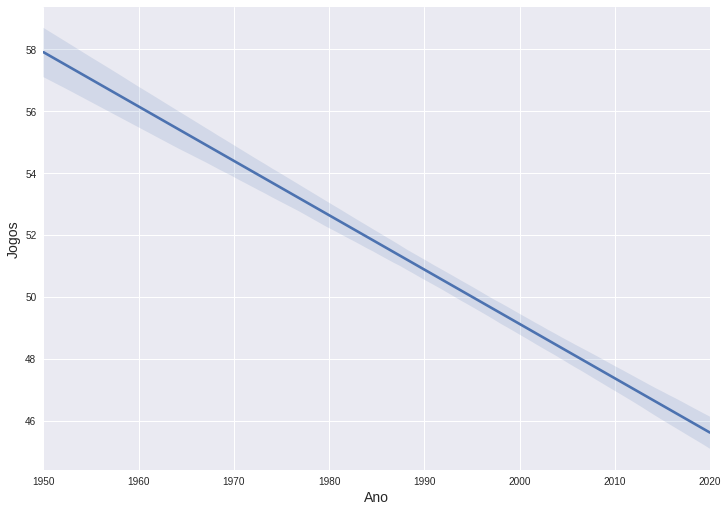

In [20]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['G'], y_label='Jogos', cor='C0')

Comprovamos que houve uma queda na média de jogos por jogadores nesses anos. Um dos principais motivos podem ser o rodizios feito por times nas NBA. Hoje há um plantel de jogadores maior, o que disponibiliza maior rotatividade entre os jogadores. Lógico que grandes estrelas continuam tendo um número elevado de jogos, mas a maioria leva a esse decrescimento nos últimos anos.

## Pontos por temporada

Veremos agora a média de pontos por jogador.

In [21]:
pontos_media_jogadores = dados.groupby('Year')['PTS'].mean()

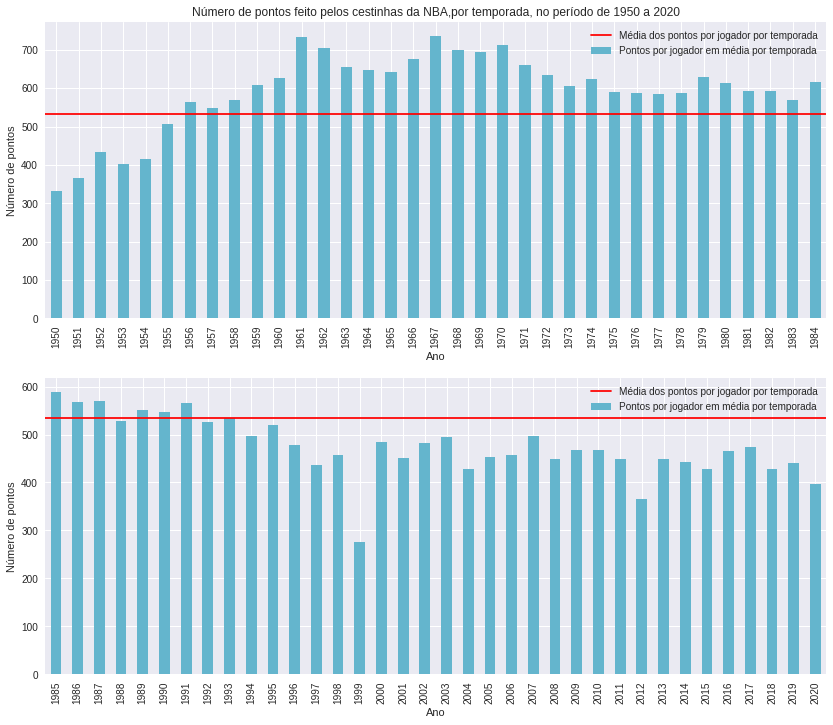

In [22]:
grafico_duas_imagens(pontos_media_jogadores, legenda_x='Ano',legenda_y='Número de pontos',
                     legenda_barras='Pontos por jogador em média por temporada',
                     legenda_linha_media='Média dos pontos por jogador por temporada',
                     titulo='Número de pontos feito pelos cestinhas da NBA,por\
 temporada, no período de 1950 a 2020', cor='C5')

Os gráficos nos mostram que há uma tendẽncia há diminuição de pontos nos últimos anos. Por mais elásticos que os placares sejam, muitas vezes passando de 120 pontos por time em um jogo, há um aumento no plantel da equipe e no número de jogos, o que faz com que mesmo nos anos 60 a 90 que tiveram placares menores, um número de pontos maior por jogador. Vamos confimar isso com uma regressão.

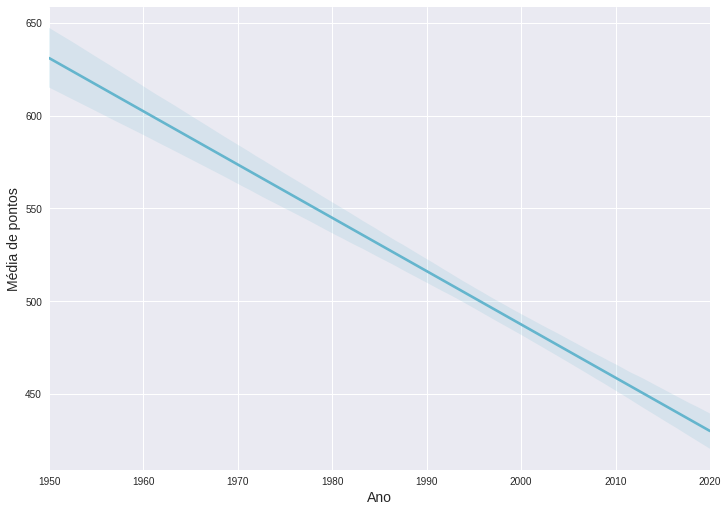

In [23]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['PTS'], y_label='Média de pontos',
                  cor='C5')

## 3 Pontos

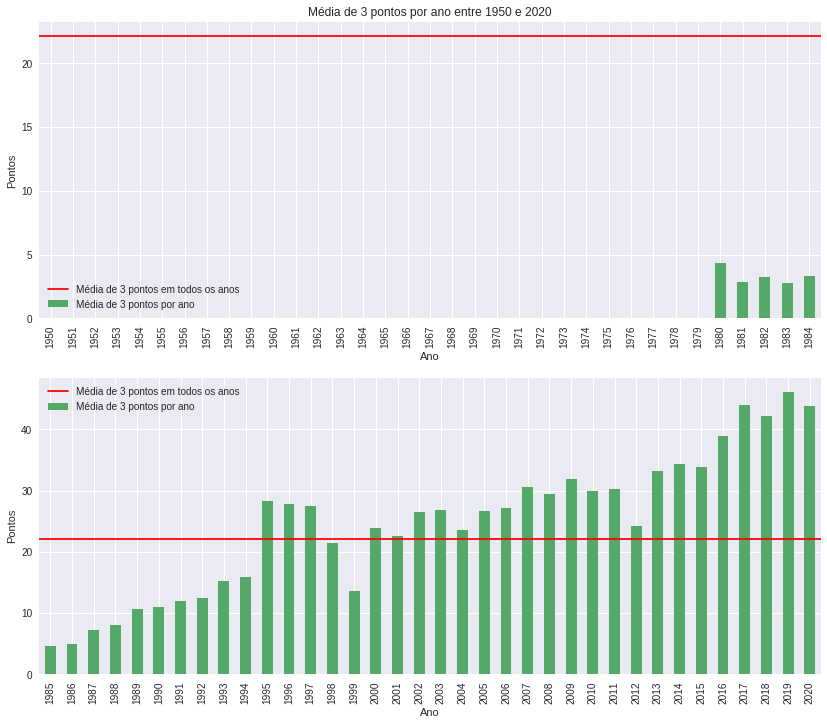

In [24]:
dados_3_pontos = dados.groupby('Year')['3P'].mean() 

grafico_duas_imagens(dados_3_pontos, legenda_x='Ano', legenda_y='Pontos',
                     legenda_linha_media='Média de 3 pontos em todos os anos',
                     titulo='Média de 3 pontos por ano entre 1950 e 2020',
                     legenda_barras='Média de 3 pontos por ano',
                     cor='C1')

A cesta de 3 pontos foi adotada pela NBA na temporada 79/80.

O primeiro time a explorar os tiros de 3 pontos foi o New York Knicks, na temporada 88/89, porém nos anos 80 e anos 90 o jogo no garrafão, com grandes pivos, como Pat Ewing, Shaquille O'Neal, Hakeem Olajuwon, ainda era uma das principais forças das equipes. 

A grande virada das cestas de 3 pontos foi a partir dos anos 2000, com o grande uso por Ray Allen, e posteriormente, nos anos 2010 entrou em seu auge, se tornando hoje uma das principais armas ofensivas do jogo, introduzidas especialmente pelo armador do Golden State Warrior, Stephen Curry.

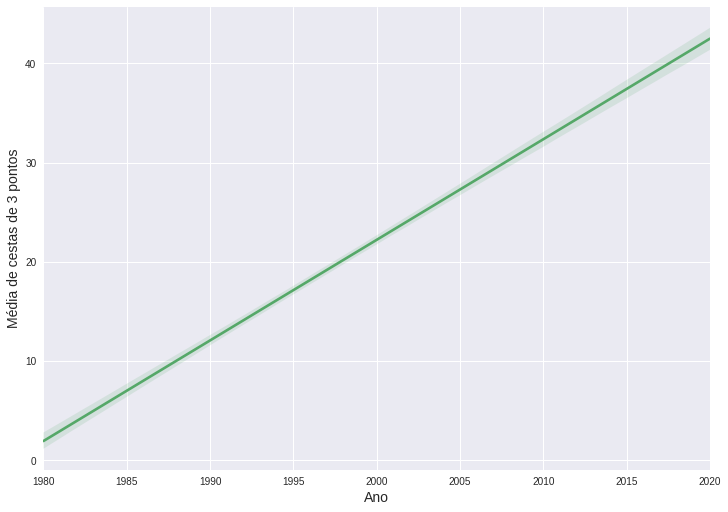

In [25]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['3P'],
                  y_label='Média de cestas de 3 pontos', cor='C1')

Com o gráfico acima, confirmamos nossas hipóteses anteriores.

## Assistências

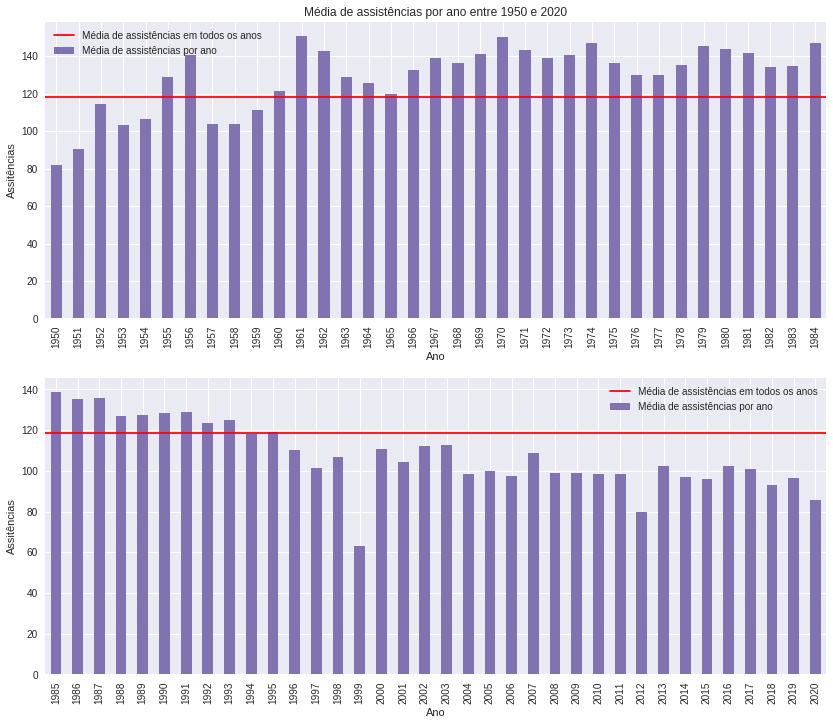

In [26]:
dados_assistencia = dados.groupby('Year')['AST'].mean() 

grafico_duas_imagens(dados_assistencia, legenda_x='Ano', legenda_y='Assitências',
                     legenda_linha_media='Média de assistências em todos os anos',
                     titulo='Média de assistências por ano entre 1950 e 2020',
                     legenda_barras='Média de assistências por ano',
                     cor='C15')

Ao longo dos anos a média de assitências por jogador diminuiu. Hoje, os jogadores da posição 1, armadores, não tem apenas a função de armar o jogo, como também tem a função de atacar a cesta, sendo muitas vezes esses jogadores os principais jogadores de seus times ou pelo menos o principal jogador ofensivo do time. 

Essa grande tendência começou a ser mais utilizada no final dos anos 90 e ínicio dos anos 2000, onde alguns times, exemplo do 76ers, lideradores pelo armador Allen Iverson, apostavam suas fichas em armadores que eram extramamente agressivos no ataque, que lideravam o time no ataque ao inves de ficar apenas armando as jogadas. Exemplos de hoje são Stephen Curry, James Harden, Russel Westbrook, entre outros.

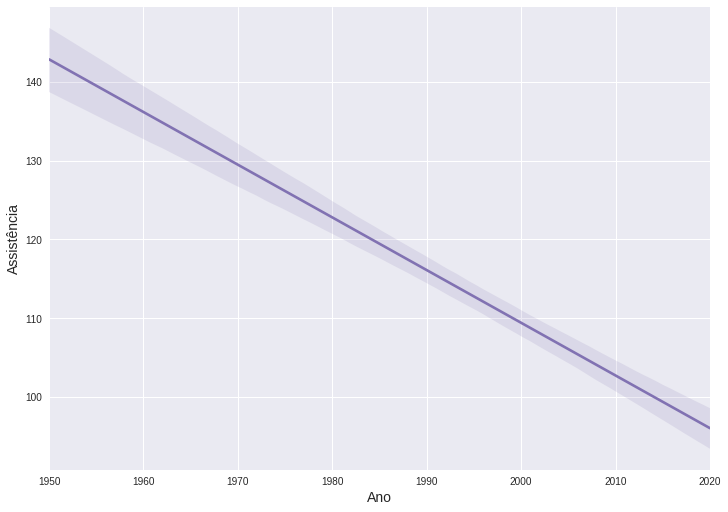

In [27]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['AST'], y_label='Assistência',
                  cor='C15')

In [28]:
ataque_serie = [dados_3_pontos, dados_assistencia, pontos_media_jogadores] 

In [29]:
ataque_df = pd.DataFrame(ataque_serie).transpose()
ataque_df

,3P,AST,PTS
Year,,,
1950,NaN,81.717949,331.929487
1951,NaN,90.486772,366.693122
1952,NaN,114.664179,434.801471
1953,NaN,103.493827,401.716049
1954,NaN,106.237037,415.940741
...,...,...,...
2016,38.970588,102.384083,465.636678
2017,43.932773,101.060504,474.732773
2018,42.266566,93.182229,428.143072


Mudando o nome das colunas

In [30]:
ataque_df.columns = ['Média de 3 pontos', 'Média de assitências', 'Média de pontos']

(0.0, 800.0)

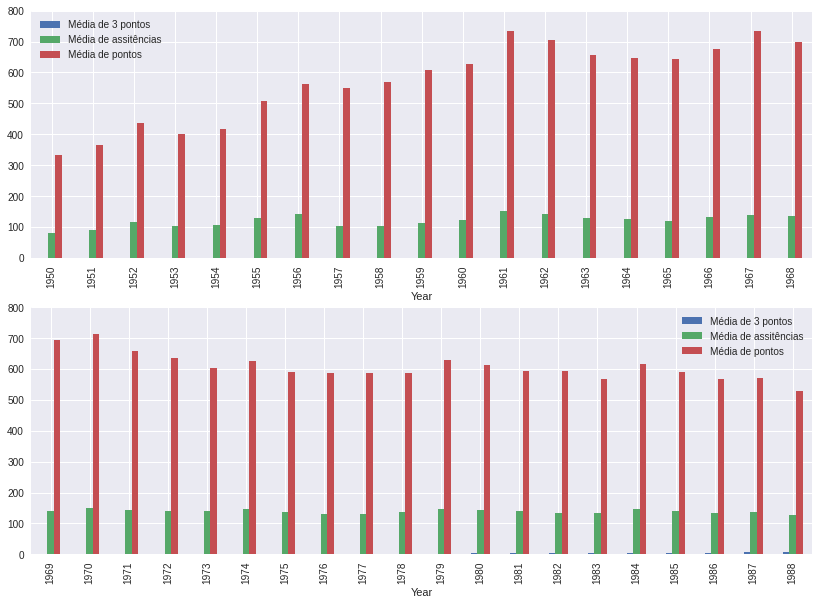

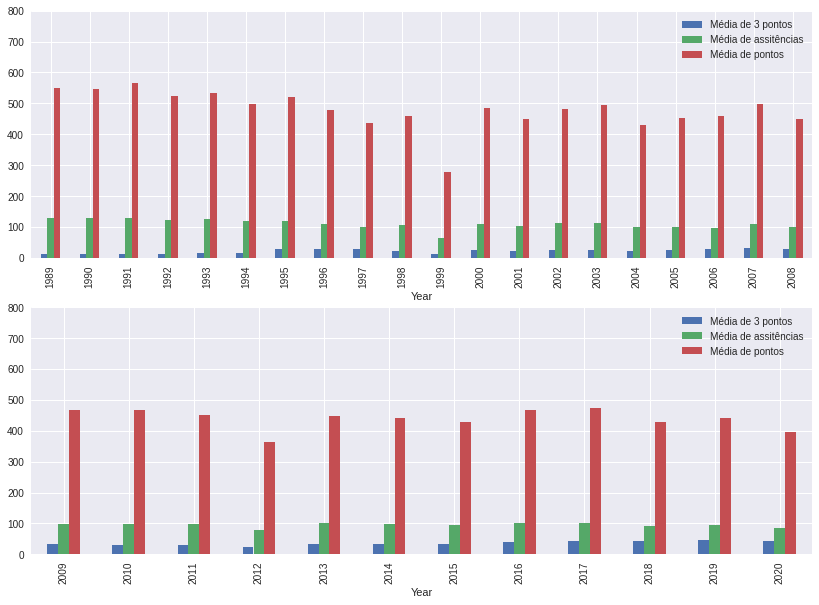

In [31]:
# criando figura 1
fig = plt.figure(figsize=(14, 12))

# criando figura 2
fig2 = plt.figure(figsize=(14, 12))

# criando eixos
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax3 = fig2.add_subplot(2, 1, 1)
ax4 = fig2.add_subplot(2, 1, 2)

ataque_df.iloc[0:19].plot(ax=ax1 ,kind='bar', figsize=(14, 10))
ataque_df.iloc[19:39].plot(ax=ax2 ,kind='bar', figsize=(14, 10))
ataque_df.iloc[39:59].plot(ax=ax3 ,kind='bar', figsize=(14, 10))
ataque_df.iloc[59:71].plot(ax=ax4 ,kind='bar', figsize=(14, 10))

# colocando todos os gráficos com os mesmo limites
ax1.set_ylim(0,800)
ax2.set_ylim(0,800)
ax3.set_ylim(0,800)
ax4.set_ylim(0,800)

Bom, vimos os principais quesitos ofensivos por temporada. Agora veremos os principais quesitos defensivos.

## Bloqueio

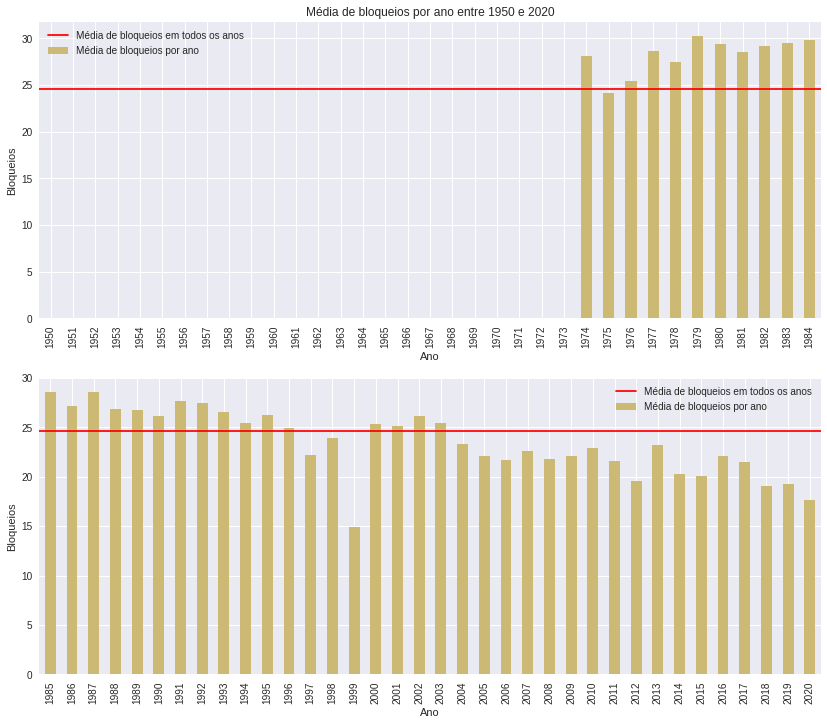

In [32]:
dados_bloqueio = dados.groupby('Year')['BLK'].mean() 

grafico_duas_imagens(dados_bloqueio, legenda_x='Ano', legenda_y='Bloqueios',
                     legenda_linha_media='Média de bloqueios em todos os anos',
                     titulo='Média de bloqueios por ano entre 1950 e 2020',
                     legenda_barras='Média de bloqueios por ano',
                     cor='C10')

O número de bloqueios começou a ser computador no ano de na temporada 73/74. Vemos que houve uma queda na média de bloqueios por jogador no últimos anos. Isso se deve ao fato de o jogo ter mudado bastante, hoje, o estilo do jogo é um jogo mais no perímetro, espaçando os jogadores na linha de 3 pontos e tentando ou uma bola de três ou uma infiltração. Antigamente havia uma maior valorização do jogo dentro do garrafão. 

Esse estilo de jogo faz com que haja maiores probabilidades de ocorrer um bloqueio em comparação com um jogo espeçado objetivando uma bola de 3 pontos. Vamos confirmar nossa hipótese com uma regressão.

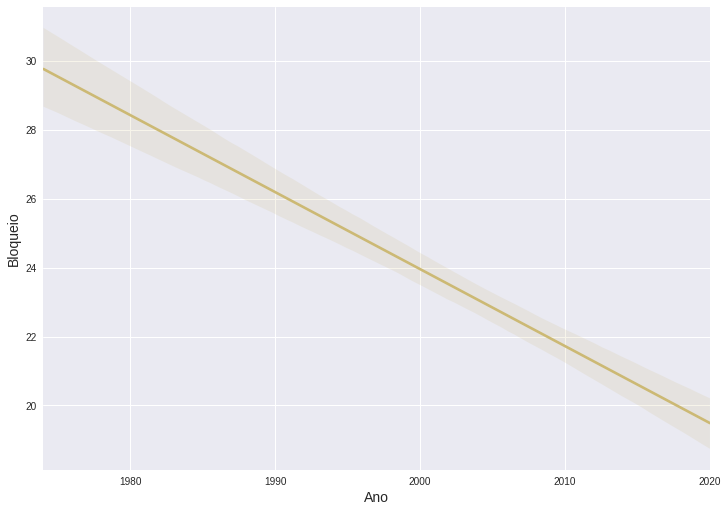

In [33]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['BLK'], y_label='Bloqueio', cor='C10')

## Roubos de bola

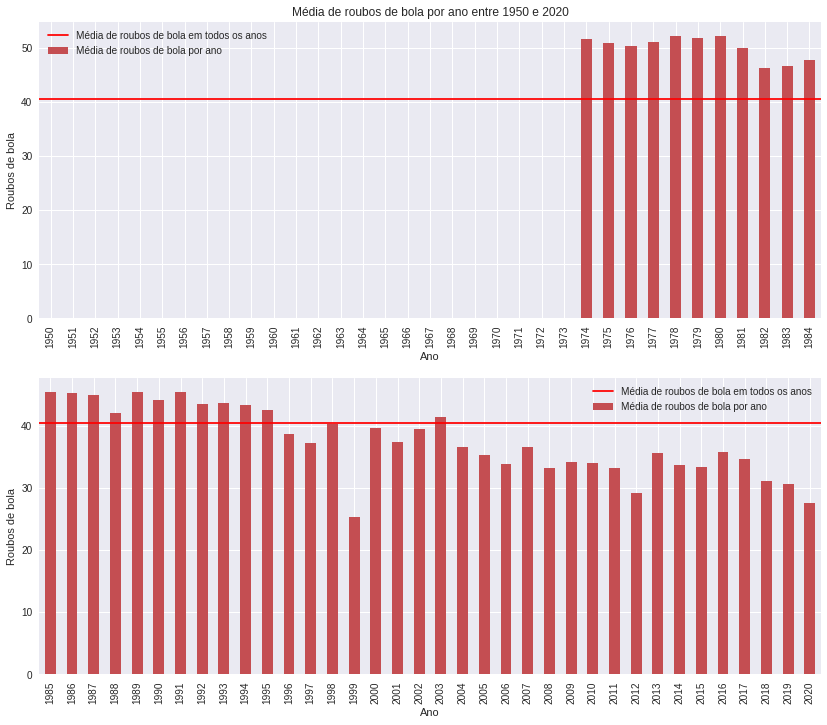

In [34]:
dados_steal = dados.groupby('Year')['STL'].mean() 

grafico_duas_imagens(dados_steal, legenda_x='Ano', legenda_y='Roubos de bola',
                     legenda_linha_media='Média de roubos de bola em todos os anos',
                     titulo='Média de roubos de bola por ano entre 1950 e 2020',
                     legenda_barras='Média de roubos de bola por ano',
                     cor='C20')

Outra tendência com queda na NBA. A queda dos roubos de bola se deve ao mesmo motivo dos bloqueios, já que o estilo atual de jogo possibilita menos roubos de bola, por ter um espaçamento maior na quadra, enquanto antigamente com o jogo mais dentro do garrafão, possibilitava uma maior taxa de roubo de bola.

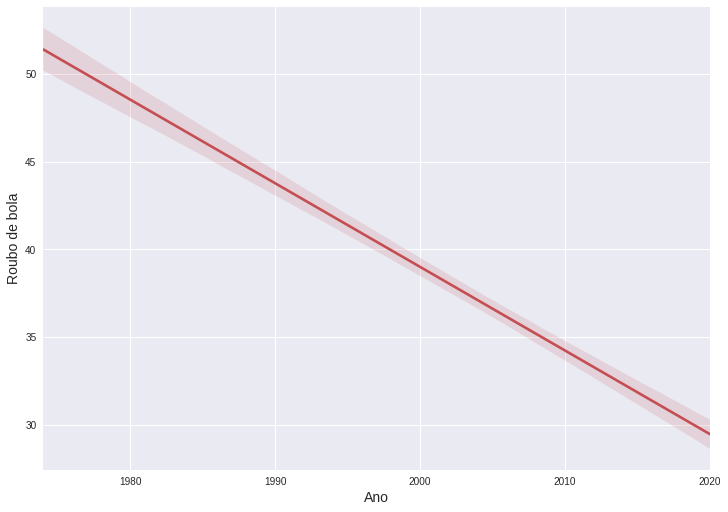

In [35]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['STL'], y_label='Roubo de bola',
                  cor='C20')

## Rebotes

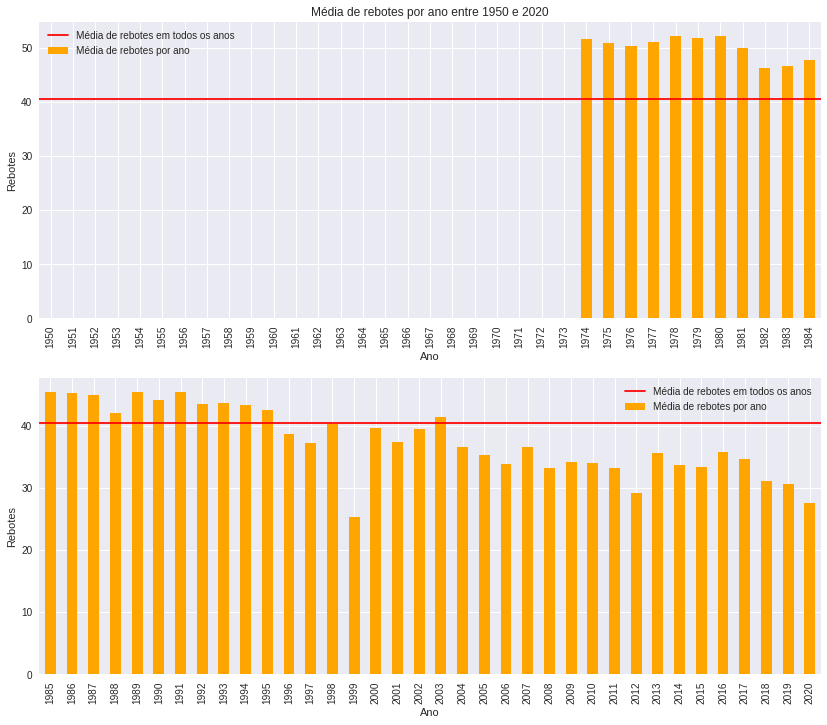

In [36]:
dados_rebotes = dados.groupby('Year')['TRB'].mean() 

grafico_duas_imagens(dados_steal, legenda_x='Ano', legenda_y='Rebotes',
                     legenda_linha_media='Média de rebotes em todos os anos',
                     titulo='Média de rebotes por ano entre 1950 e 2020',
                     legenda_barras='Média de rebotes por ano',
                     cor='orange')

Há uma queda, porém isso não se deve ao fato de pegarem menos rebotes hoje em dia, e sim ao maior número de jogadores por elenco. Como há um maior número de jogadores, maior será o número de jogadores que irão participar da média, fazendo com que a média seja menor.

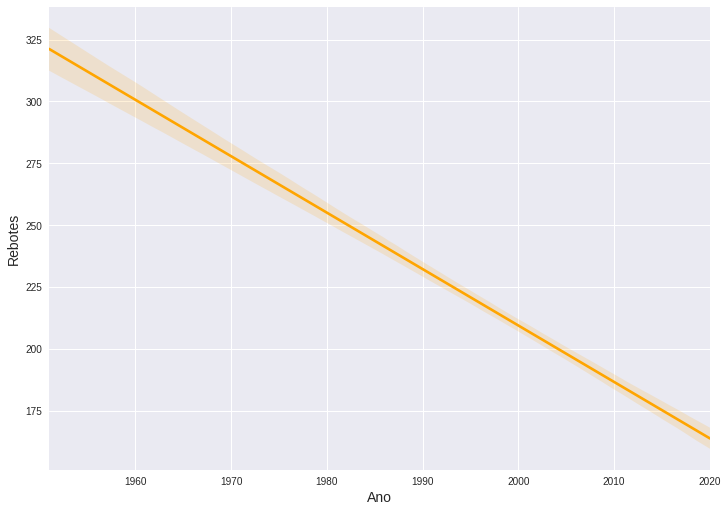

In [37]:
grafico_regressao(eixo_x=dados['Year'], eixo_y=dados['TRB'], y_label='Rebotes',
                  cor='orange')

In [38]:
defesa_serie = [dados_bloqueio, dados_rebotes, dados_steal] 

In [39]:
defesa_df = pd.DataFrame(defesa_serie).transpose()
defesa_df

,BLK,TRB,STL
Year,,,
1950,NaN,NaN,NaN
1951,NaN,207.508571,NaN
1952,NaN,254.871212,NaN
1953,NaN,228.062500,NaN
1954,NaN,249.061069,NaN
...,...,...,...
2016,22.133218,197.588235,35.728374
2017,21.478992,196.312605,34.653782
2018,19.010542,174.284639,31.146084


In [40]:
defesa_df.columns = ['Média de bloqueios', 'Média de rebotes', 'Média de roubos de bola']

(0.0, 450.0)

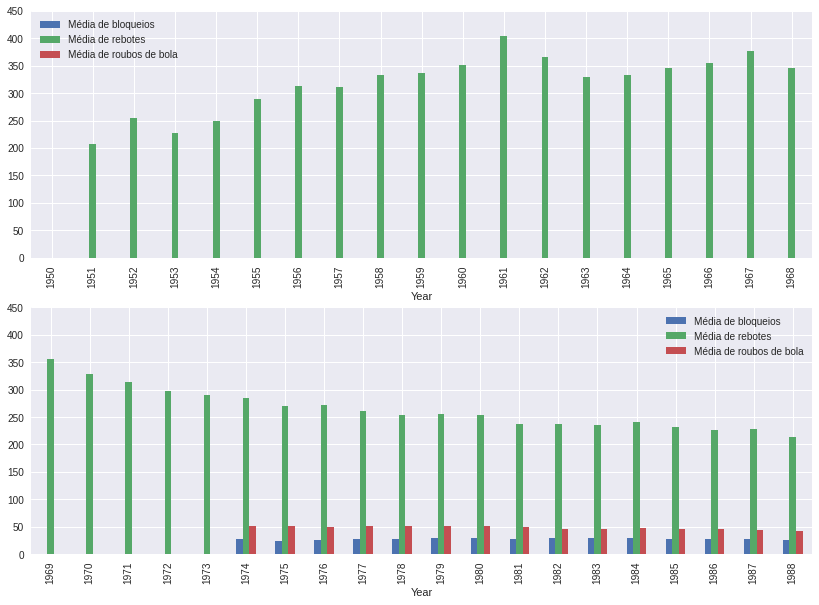

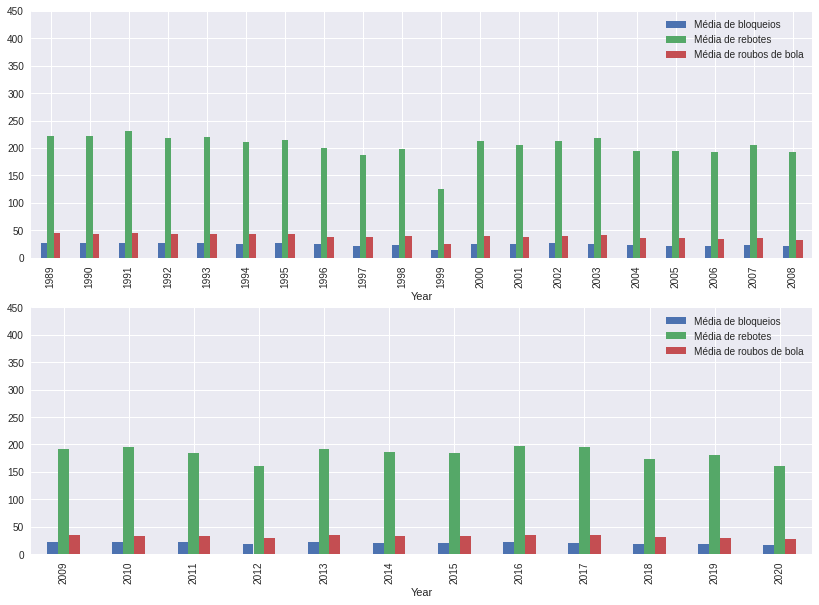

In [41]:
# criando figura 1
fig = plt.figure(figsize=(14, 12))

# criando figura 2
fig2 = plt.figure(figsize=(14, 12))

# criando eixos
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax3 = fig2.add_subplot(2, 1, 1)
ax4 = fig2.add_subplot(2, 1, 2)

defesa_df.iloc[0:19].plot(ax=ax1 ,kind='bar', figsize=(14, 10))
defesa_df.iloc[19:39].plot(ax=ax2 ,kind='bar', figsize=(14, 10))
defesa_df.iloc[39:59].plot(ax=ax3 ,kind='bar', figsize=(14, 10))
defesa_df.iloc[59:71].plot(ax=ax4 ,kind='bar', figsize=(14, 10))

# colocando todos os gráficos com os mesmo limites
ax1.set_ylim(0,450)
ax2.set_ylim(0,450)
ax3.set_ylim(0,450)
ax4.set_ylim(0,450)

## Conclusão para temporadas
Vendo todos os dados das temporadas podemos concluir algumas coisas:
1. Há uma maior tendência no jogo ofensivo, principalmente com bolas de 3 nos dias atuais quando comparados com décadas anteriores
2. Defensivamente, pelos dados, a NBA era mais forte, pois era muito comum os times terem defesas muito sólidas, com grandes defensores como Hakeem Olajuwon ou Dennis Rodman. E a tendência do jogo ser mais dentro do garrafão, fazia com que houvesse um jogo de mais contato, que salientava a grande importância da defesa.
3. Há um tendência a queda de pontos por jogador na NBA. O esporte hoje ele tem um quesito coletivo maior, fazendo com que a participação de jogadores que não tem uma grande representação ofensiva aconteça com maior frequência. Além disso há um maior número de jogadores por elenco, 15 atualmente, fazendo com que a divisão de pontos seja por todos os jogadores.

Bom, visto tudo acima, onde conseguimos analisar as temporadas, vamos agora ver por jogadores.

Primeiro, vamos ver os 10 maiores pontuadores da história.

In [42]:
dados_pontuacao = dados[['Player','PTS', '2P', '2PA', '3P', '3PA','FT',
                           'FTA', 'AST', 'STL', 'BLK', 'TRB', 'ORB', 'DRB']]
jogadores = dados_pontuacao.groupby('Player', as_index=False).sum()
maiores_pontuadores = jogadores.sort_values(by=['PTS'], axis=0, ascending=False)
maiores_pontuadores.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2379,Kareem Abdul-Jabbar*,38387.0,15836.0,28289.0,1.0,18.0,6712.0,9304.0,5660.0,1160.0,3189.0,17440.0,2975.0,9394.0
2381,Karl Malone*,36928.0,13443.0,25900.0,85.0,310.0,9787.0,13188.0,5248.0,2085.0,1145.0,14968.0,3562.0,11406.0
2619,LeBron James,34241.0,10606.0,19328.0,1875.0,5453.0,7404.0,10082.0,9346.0,2015.0,957.0,9405.0,1509.0,7896.0
4215,Wilt Chamberlain*,33953.0,13744.0,25580.0,0.0,0.0,6465.0,12742.0,4893.0,0.0,0.0,25597.0,0.0,0.0
2522,Kobe Bryant*,33643.0,9892.0,20654.0,1827.0,5546.0,8378.0,10011.0,6306.0,1944.0,640.0,7047.0,1499.0,5548.0
2931,Michael Jordan*,32292.0,11611.0,22759.0,581.0,1778.0,7327.0,8772.0,5633.0,2514.0,893.0,6672.0,1668.0,5004.0
1323,Eddie Johnson,31852.0,11946.0,24568.0,783.0,2334.0,5611.0,6836.0,6482.0,1591.0,282.0,6884.0,2420.0,4464.0
1163,Dirk Nowitzki,31560.0,9187.0,18524.0,1982.0,5210.0,7240.0,8239.0,3651.0,1210.0,1281.0,11489.0,1468.0,10021.0
3685,Shaquille O'Neal*,29428.0,11660.0,19993.0,1.0,22.0,6105.0,11590.0,3119.0,771.0,2820.0,13653.0,4375.0,9278.0
4095,Vince Carter,28636.0,7845.0,16969.0,2533.0,6802.0,5347.0,6715.0,5187.0,1706.0,956.0,7282.0,1818.0,5464.0


Como anteriormente, vamos focar primeiro no ataque e depois na defesa

# Ataque


No ataque, nós analisaremos.

1. Maiores pontuadores de 3 pontos.
2. Eficiência desses maiores pontuadores de 3 pontos.
3. Maiores pontuadores de 2 pontos.
4. Eficiência desses maiores pontuadores de 2 pontos.
5. Maiores pontuadores de lances livres.
6. Maiores assistentes

Para uma melhor visualização, vamos considerar como maiores apenas os 10 primeiros colocados de cada quesito.

Nos quesitos de eficiência, consideramos as eficiências dos maiores pontuadores apenas, pois há possivelmente jogadores mais eficientes, porém com número mais baixos, o que faz com que seja difícil a comparação.

## 3 pontos

Começaremos pela maior tendência da NBA atual: a bola de 3 pontos. Levamos em consideração nesse critério a quantidade de cestas de 3 pontos feitas.

In [43]:
maiores_pontuadores_3pt = jogadores.sort_values(by=['3P'], axis=0, ascending=False)
maiores_pontuadores_3pt.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
3358,Ray Allen*,26218.0,5991.0,12356.0,3174.0,7962.0,4714.0,5265.0,4695.0,1554.0,258.0,5653.0,1324.0,4329.0
2544,Kyle Korver,13971.0,1937.0,4132.0,2861.0,6718.0,1514.0,1724.0,2406.0,905.0,465.0,4163.0,382.0,3781.0
3397,Reggie Miller*,25279.0,5681.0,11013.0,2560.0,6486.0,6237.0,7026.0,4141.0,1505.0,299.0,4182.0,883.0,3299.0
4095,Vince Carter,28636.0,7845.0,16969.0,2533.0,6802.0,5347.0,6715.0,5187.0,1706.0,956.0,7282.0,1818.0,5464.0
3760,Stephen Curry,16419.0,3187.0,6192.0,2495.0,5739.0,2560.0,2827.0,4621.0,1205.0,156.0,3158.0,490.0,2668.0
1854,Jamal Crawford,20699.0,4808.0,10716.0,2363.0,6773.0,3994.0,4630.0,4829.0,1236.0,284.0,3141.0,489.0,2652.0
1873,James Harden,20962.0,3847.0,7531.0,2324.0,6394.0,6296.0,7336.0,5255.0,1314.0,443.0,4446.0,652.0,3794.0
1937,Jason Terry,18881.0,4632.0,9575.0,2282.0,6010.0,2771.0,3278.0,5415.0,1603.0,275.0,3274.0,502.0,2772.0
672,Chauncey Billups,19303.0,3522.0,8126.0,2245.0,5810.0,5524.0,6172.0,6843.0,1322.0,204.0,3611.0,599.0,3012.0
2149,Joe Johnson,22350.0,6420.0,13603.0,2176.0,5919.0,2982.0,3708.0,5581.0,1209.0,291.0,5780.0,1205.0,4575.0


No handles with labels found to put in legend.


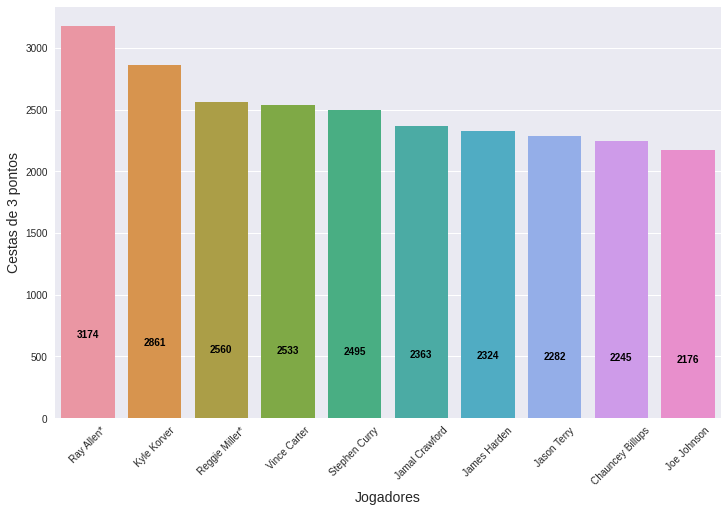

In [44]:
plot_grafico_barras(eixo_x=maiores_pontuadores_3pt['Player'],
                    eixo_y=maiores_pontuadores_3pt['3P'],
                    y_label='Cestas de 3 pontos', casas_decimais=0)

Ray Allen, um grande ala-armador dos anos 2000, bicampeão da NBA é o principal pontuador de 3 pontos da história atualmente. Possivelmente deve ser passado por Stephen Curry no futuro.

## Eficiência 3 pontos

Aqui, consideramos a quantidade de cestas feitas divido pela quantidade tentada.

In [45]:
maiores_pontuadores_3pt['3P%'] = (maiores_pontuadores_3pt['3P'] / maiores_pontuadores_3pt['3PA']) 

In [46]:
media_eficiencia_3pt = (maiores_pontuadores_3pt['3P%'].head(100).sum() / 100)
media_eficiencia_3pt

0.37120361388990636

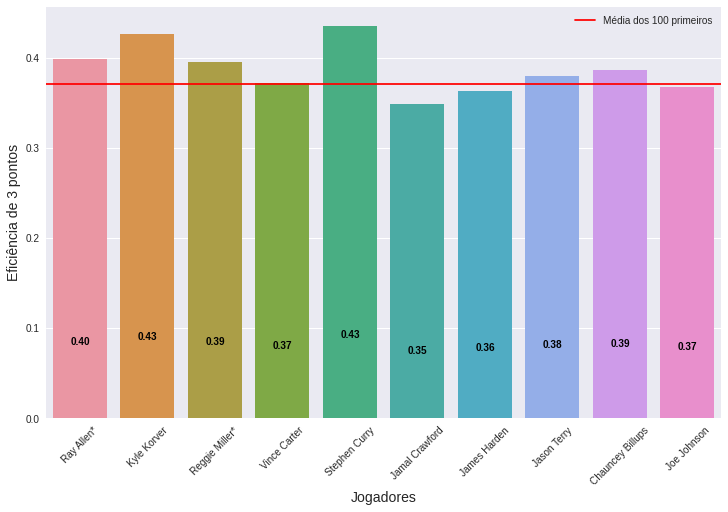

In [47]:
plot_grafico_barras(eixo_x=maiores_pontuadores_3pt['Player'],
                    eixo_y=maiores_pontuadores_3pt['3P%'],
                    y_label='Eficiência de 3 pontos')

Vemos que Stephen Curry é hoje o chutador mais eficiente de 3 pontos da história. Muitos já o consideram o melhor arremessador da história da NBA, com seus arremos certeiros foi capaz de levar o Golden State Warriors a 3 aneis de campeão na última década.

## 2 pontos

Jogadores que mais acertaram cestas de 2 pontos.

In [48]:
maiores_pontuadores_2pt = jogadores.sort_values(by=['2P'], axis=0, ascending=False)

In [49]:
maiores_pontuadores_2pt.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2379,Kareem Abdul-Jabbar*,38387.0,15836.0,28289.0,1.0,18.0,6712.0,9304.0,5660.0,1160.0,3189.0,17440.0,2975.0,9394.0
4215,Wilt Chamberlain*,33953.0,13744.0,25580.0,0.0,0.0,6465.0,12742.0,4893.0,0.0,0.0,25597.0,0.0,0.0
2381,Karl Malone*,36928.0,13443.0,25900.0,85.0,310.0,9787.0,13188.0,5248.0,2085.0,1145.0,14968.0,3562.0,11406.0
1323,Eddie Johnson,31852.0,11946.0,24568.0,783.0,2334.0,5611.0,6836.0,6482.0,1591.0,282.0,6884.0,2420.0,4464.0
3685,Shaquille O'Neal*,29428.0,11660.0,19993.0,1.0,22.0,6105.0,11590.0,3119.0,771.0,2820.0,13653.0,4375.0,9278.0
2931,Michael Jordan*,32292.0,11611.0,22759.0,581.0,1778.0,7327.0,8772.0,5633.0,2514.0,893.0,6672.0,1668.0,5004.0
79,Alex English*,26931.0,11192.0,22060.0,20.0,89.0,4487.0,5407.0,4575.0,1140.0,895.0,7143.0,3047.0,4096.0
1358,Elvin Hayes*,27313.0,10971.0,24238.0,5.0,34.0,5356.0,7999.0,2398.0,864.0,1771.0,16279.0,2778.0,6973.0
1655,Hakeem Olajuwon*,26946.0,10724.0,20867.0,25.0,124.0,5423.0,7621.0,3058.0,2162.0,3830.0,13748.0,4034.0,9714.0
2619,LeBron James,34241.0,10606.0,19328.0,1875.0,5453.0,7404.0,10082.0,9346.0,2015.0,957.0,9405.0,1509.0,7896.0


No handles with labels found to put in legend.


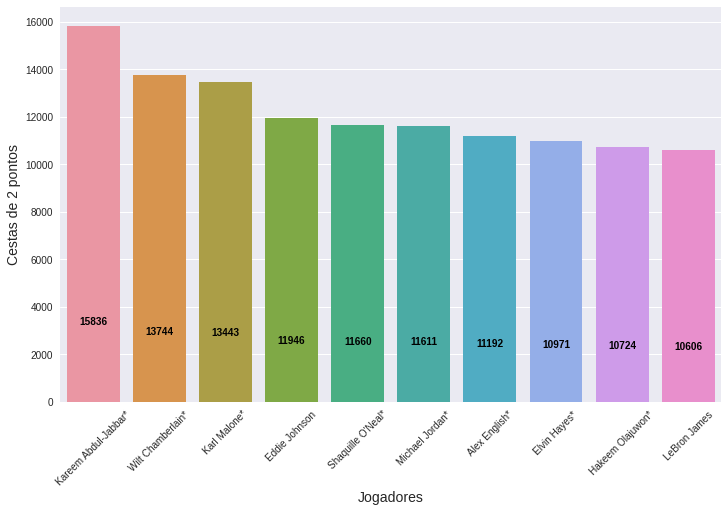

In [50]:
plot_grafico_barras(eixo_x=maiores_pontuadores_2pt['Player'],
                    eixo_y=maiores_pontuadores_2pt['2P'],
                    y_label='Cestas de 2 pontos', casas_decimais=0)

Kareem Abdul-Jabbar leva esse quesito. Um dos maiores jogadores de todos os tempos, sendo colocado por muito no top 3 de todos os tempos, sendo 6 vezes campeão da NBA e 6 vezes MVP da temporada regular, Kareem é uma lenda do basquete.

## Eficiências 2 pontos

Aqui levaremos em conta as cestas feitas divididas pelas tentativas de cestas de 2 pontos{

In [51]:
maiores_pontuadores_2pt['2P%'] = (maiores_pontuadores_2pt['2P'] / maiores_pontuadores_2pt['2PA']) 

In [52]:
media_2pt = (maiores_pontuadores_2pt['2P%'].head(100).sum() / 100)

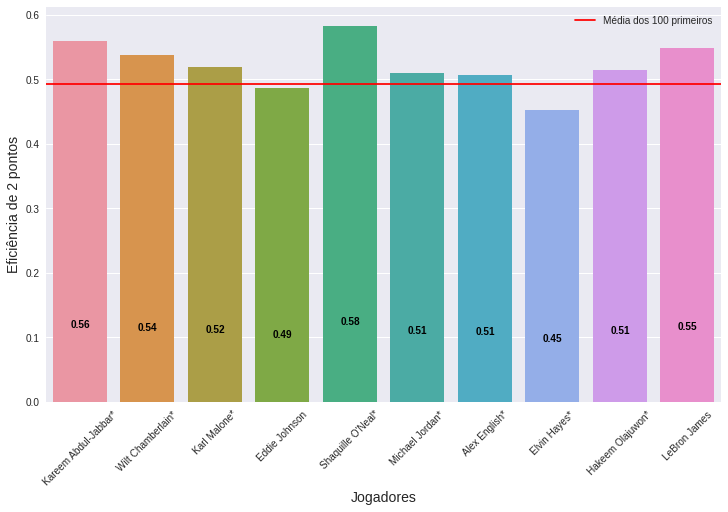

In [53]:
plot_grafico_barras(eixo_x=maiores_pontuadores_2pt['Player'],
                    eixo_y=maiores_pontuadores_2pt['2P%'],
                    y_label='Eficiência de 2 pontos')

Shaquille O'Neal, o pivô mais gente boa da história da NBA e considerado por muitos como o mais dominante também, era uma força da natureza embaixo do garrafão. 4 vezes campeão NBA e top 10 maiores jogadores de todos os tempos, Shaq possui um jogo imparável dentro do garrafão, o que faz com que sua eficiência seja maior que a dos outros.

## Lances livres

Veremos aqui os jogadores que mais acertaram lances livres.

In [54]:
maiores_pontuadores_lv = jogadores.sort_values(by=['FT'], axis=0, ascending=False)

In [55]:
maiores_pontuadores_lv.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2381,Karl Malone*,36928.0,13443.0,25900.0,85.0,310.0,9787.0,13188.0,5248.0,2085.0,1145.0,14968.0,3562.0,11406.0
3057,Moses Malone*,28492.0,9816.0,19955.0,8.0,80.0,8836.0,11530.0,1885.0,1156.0,1914.0,17284.0,7168.0,10116.0
2522,Kobe Bryant*,33643.0,9892.0,20654.0,1827.0,5546.0,8378.0,10011.0,6306.0,1944.0,640.0,7047.0,1499.0,5548.0
34,Adrian Dantley*,26274.0,9210.0,17161.0,7.0,42.0,7833.0,9599.0,3254.0,1105.0,187.0,6392.0,2589.0,3803.0
3169,Oscar Robertson*,26710.0,9508.0,19620.0,0.0,0.0,7694.0,9185.0,9887.0,77.0,4.0,7804.0,71.0,208.0
2619,LeBron James,34241.0,10606.0,19328.0,1875.0,5453.0,7404.0,10082.0,9346.0,2015.0,957.0,9405.0,1509.0,7896.0
2931,Michael Jordan*,32292.0,11611.0,22759.0,581.0,1778.0,7327.0,8772.0,5633.0,2514.0,893.0,6672.0,1668.0,5004.0
1163,Dirk Nowitzki,31560.0,9187.0,18524.0,1982.0,5210.0,7240.0,8239.0,3651.0,1210.0,1281.0,11489.0,1468.0,10021.0
101,Allen Iverson*,27457.0,8374.0,18665.0,1158.0,3704.0,7235.0,9256.0,6488.0,2213.0,185.0,3839.0,814.0,3025.0
2043,Jerry West*,25192.0,9016.0,19032.0,0.0,0.0,7160.0,8801.0,6238.0,81.0,23.0,5366.0,30.0,86.0


No handles with labels found to put in legend.


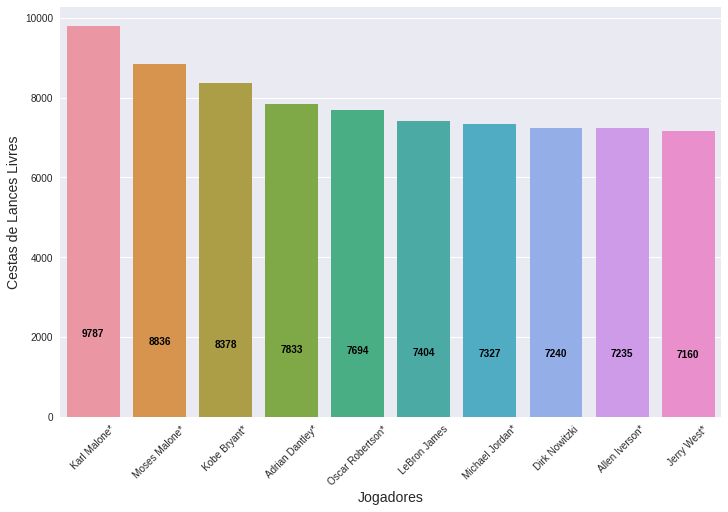

In [56]:
plot_grafico_barras(eixo_x=maiores_pontuadores_lv['Player'],
                    eixo_y=maiores_pontuadores_lv['FT'],
                    y_label='Cestas de Lances Livres', casas_decimais=0)


Karl Malone, principal jogador o Utah Jazz dos anos 90, um ala de força, duas vezes MVP da temporada regular, sendo um dos maiores jogadores da história. Pelo seu jogo de força absurdo, sofria muitas faltas, o que fez ele ir várias vezes a linha de lances livres.

## Eficiência lances livres

In [57]:
maiores_pontuadores_lv['FT%'] = (maiores_pontuadores_lv['FT'] / maiores_pontuadores_2pt['FTA']) 

In [58]:
media_lv = (maiores_pontuadores_lv['FT%'].head(100).sum() / 100)

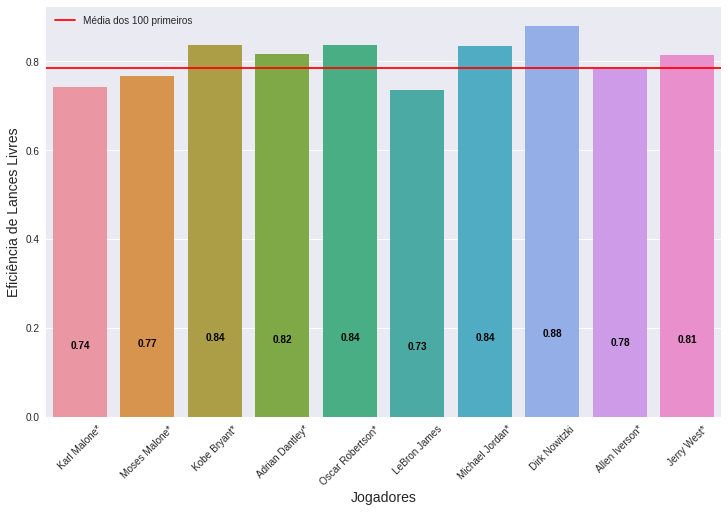

In [59]:
plot_grafico_barras(eixo_x=maiores_pontuadores_lv['Player'],
                    eixo_y=maiores_pontuadores_lv['FT%'],
                    y_label='Eficiência de Lances Livres')

O alemão Dirk Nowitzki, uma vez MVP da temporada regular e uma vez campeão da NBA é o jogador mais eficiente na linha de lance livre da história.

## Assistência

In [60]:
maiores_jogadores_assistentes = jogadores.sort_values(by=['AST'], axis=0, ascending=False)

In [61]:
maiores_jogadores_assistentes.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2239,John Stockton*,19711.0,6194.0,11455.0,845.0,2203.0,4788.0,5796.0,15806.0,3265.0,315.0,4051.0,966.0,3085.0
1930,Jason Kidd*,18992.0,4569.0,10701.0,2168.0,6178.0,3350.0,4284.0,13393.0,2944.0,496.0,9574.0,1926.0,7648.0
2799,Mark Jackson,13932.0,4456.0,9395.0,870.0,2598.0,2410.0,3124.0,11930.0,1789.0,136.0,5663.0,1435.0,4228.0
3793,Steve Nash*,17387.0,4636.0,8953.0,1685.0,3939.0,3060.0,3384.0,10335.0,899.0,102.0,3642.0,643.0,2999.0
2730,Magic Johnson*,17707.0,5886.0,10877.0,325.0,1074.0,4960.0,5850.0,10141.0,1724.0,374.0,6559.0,1601.0,4958.0
3169,Oscar Robertson*,26710.0,9508.0,19620.0,0.0,0.0,7694.0,9185.0,9887.0,77.0,4.0,7804.0,71.0,208.0
135,Andre Miller,18135.0,6551.0,13654.0,218.0,986.0,4379.0,5444.0,9717.0,1738.0,252.0,5481.0,1547.0,3934.0
721,Chris Paul,18829.0,5217.0,10289.0,1379.0,3730.0,4258.0,4892.0,9653.0,2233.0,133.0,4611.0,667.0,3944.0
1508,Gary Payton*,23447.0,8187.0,16412.0,1186.0,3752.0,3515.0,4832.0,9629.0,2578.0,305.0,5603.0,1471.0,4132.0
2619,LeBron James,34241.0,10606.0,19328.0,1875.0,5453.0,7404.0,10082.0,9346.0,2015.0,957.0,9405.0,1509.0,7896.0


No handles with labels found to put in legend.


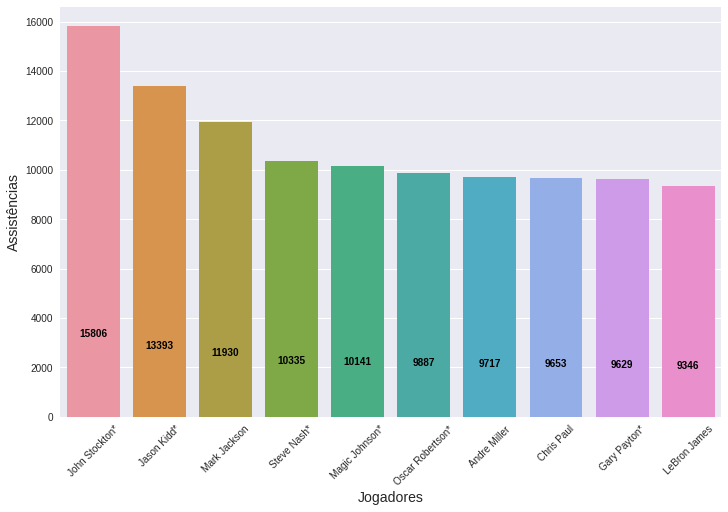

In [62]:
plot_grafico_barras(eixo_x=maiores_jogadores_assistentes['Player'],
                    eixo_y=maiores_jogadores_assistentes['AST'],
                    y_label='Assistências', casas_decimais=0)

John Stockton, grande armador do Utah Jazz dos anos 90, fazia uma das melhores duplas da época junto com seu companheiro Karl Malone.

# Defesa

Na defesa, nós analisaremos.

1. Maiores reboteiros ofensivos.
2. Maiores reboteiros defensivos.
3. Maiores reboteiros totais.
4. Maiores bloqueadores.
5. Maiores roubadores de bola.

## Rebotes ofensivos

In [63]:
maiores_reboteiros_ofensivos = jogadores.sort_values(by=['ORB'], axis=0, ascending=False)
maiores_reboteiros_ofensivos.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
3057,Moses Malone*,28492.0,9816.0,19955.0,8.0,80.0,8836.0,11530.0,1885.0,1156.0,1914.0,17284.0,7168.0,10116.0
2502,Kevin Willis,19923.0,8152.0,16769.0,45.0,220.0,3484.0,4884.0,1517.0,1107.0,879.0,13803.0,4744.0,9059.0
3470,Robert Parish*,23334.0,9614.0,17908.0,0.0,6.0,4106.0,5694.0,2180.0,1219.0,2361.0,14715.0,4598.0,10117.0
547,Buck Williams,16784.0,6399.0,11631.0,5.0,30.0,3971.0,5979.0,1646.0,1080.0,1100.0,13017.0,4526.0,8491.0
3685,Shaquille O'Neal*,29428.0,11660.0,19993.0,1.0,22.0,6105.0,11590.0,3119.0,771.0,2820.0,13653.0,4375.0,9278.0
1064,Dennis Rodman*,6683.0,2684.0,4955.0,82.0,355.0,1069.0,1832.0,1600.0,611.0,531.0,11954.0,4329.0,7625.0
639,Charles Barkley*,23757.0,7897.0,13585.0,538.0,2020.0,6349.0,8643.0,4215.0,1648.0,888.0,12546.0,4260.0,8286.0
1155,Dikembe Mutombo*,12478.0,4438.0,8599.0,0.0,2.0,3602.0,5251.0,1316.0,523.0,3492.0,13374.0,4115.0,9259.0
1655,Hakeem Olajuwon*,26946.0,10724.0,20867.0,25.0,124.0,5423.0,7621.0,3058.0,2162.0,3830.0,13748.0,4034.0,9714.0
649,Charles Oakley,12417.0,4767.0,9994.0,68.0,269.0,2679.0,3522.0,3217.0,1351.0,384.0,12205.0,3924.0,8281.0


No handles with labels found to put in legend.


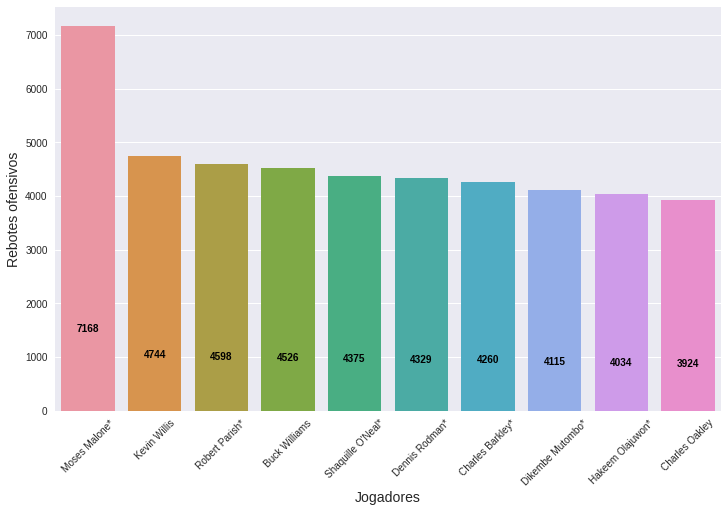

In [64]:
plot_grafico_barras(eixo_x=maiores_reboteiros_ofensivos['Player'],
                    eixo_y=maiores_reboteiros_ofensivos['ORB'],
                    y_label='Rebotes ofensivos', casas_decimais=0)


O três vezes MVP da NBA e uma vez campeão, o grande pivô Moses Malone, tendo uma diferença absurda para o segundo lugar. Para muitos, esse é um dos recordes quase impossíveis de quebrar na NBA

## Rebotes defensivos

In [65]:
maiores_reboteiros_defensivos = jogadores.sort_values(by=['DRB'], axis=0, ascending=False)
maiores_reboteiros_defensivos.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2474,Kevin Garnett*,26394.0,10473.0,20809.0,175.0,639.0,4923.0,6235.0,5522.0,1905.0,2054.0,14973.0,3257.0,11716.0
2381,Karl Malone*,36928.0,13443.0,25900.0,85.0,310.0,9787.0,13188.0,5248.0,2085.0,1145.0,14968.0,3562.0,11406.0
3895,Tim Duncan*,26496.0,10255.0,20166.0,30.0,168.0,5896.0,8468.0,4225.0,1025.0,3020.0,15091.0,3859.0,11232.0
3470,Robert Parish*,23334.0,9614.0,17908.0,0.0,6.0,4106.0,5694.0,2180.0,1219.0,2361.0,14715.0,4598.0,10117.0
3057,Moses Malone*,28492.0,9816.0,19955.0,8.0,80.0,8836.0,11530.0,1885.0,1156.0,1914.0,17284.0,7168.0,10116.0
1163,Dirk Nowitzki,31560.0,9187.0,18524.0,1982.0,5210.0,7240.0,8239.0,3651.0,1210.0,1281.0,11489.0,1468.0,10021.0
1265,Dwight Howard,18631.0,6730.0,11426.0,9.0,68.0,5144.0,9099.0,1580.0,1017.0,2130.0,13691.0,3843.0,9848.0
1655,Hakeem Olajuwon*,26946.0,10724.0,20867.0,25.0,124.0,5423.0,7621.0,3058.0,2162.0,3830.0,13748.0,4034.0,9714.0
2379,Kareem Abdul-Jabbar*,38387.0,15836.0,28289.0,1.0,18.0,6712.0,9304.0,5660.0,1160.0,3189.0,17440.0,2975.0,9394.0
3685,Shaquille O'Neal*,29428.0,11660.0,19993.0,1.0,22.0,6105.0,11590.0,3119.0,771.0,2820.0,13653.0,4375.0,9278.0


No handles with labels found to put in legend.


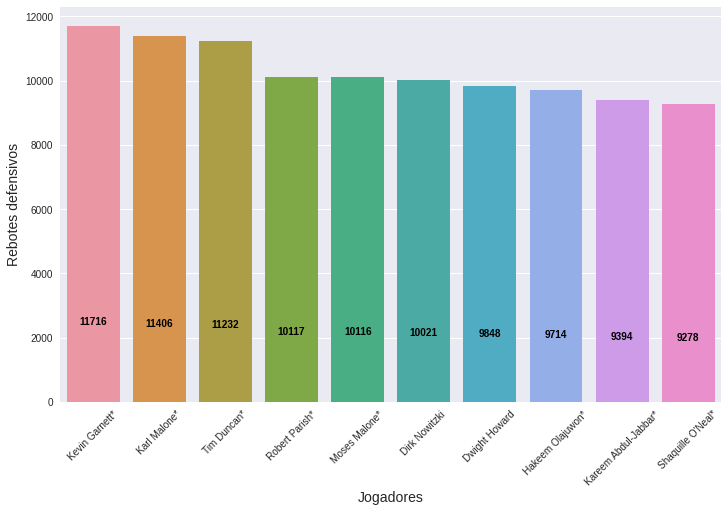

In [66]:
plot_grafico_barras(eixo_x=maiores_reboteiros_defensivos['Player'],
                    eixo_y=maiores_reboteiros_defensivos['DRB'],
                    y_label='Rebotes defensivos', casas_decimais=0)


O uma vez campeão e uma vez MVP da temporada regular Kevin Garnett é o líder nesse quesito. Com uma estatura de 2,11m era difícil competir com ele nos rebotes defensivos.

## Rebotes totais

In [67]:
maiores_reboteiros_totais = jogadores.sort_values(by=['TRB'], axis=0, ascending=False)
maiores_reboteiros_totais.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
4215,Wilt Chamberlain*,33953.0,13744.0,25580.0,0.0,0.0,6465.0,12742.0,4893.0,0.0,0.0,25597.0,0.0,0.0
327,Bill Russell*,14522.0,5687.0,12930.0,0.0,0.0,3148.0,5614.0,4100.0,0.0,0.0,21620.0,0.0,0.0
2379,Kareem Abdul-Jabbar*,38387.0,15836.0,28289.0,1.0,18.0,6712.0,9304.0,5660.0,1160.0,3189.0,17440.0,2975.0,9394.0
4125,Walt Bellamy*,25205.0,9523.0,18487.0,0.0,0.0,6159.0,9768.0,3098.0,52.0,48.0,17303.0,264.0,481.0
3057,Moses Malone*,28492.0,9816.0,19955.0,8.0,80.0,8836.0,11530.0,1885.0,1156.0,1914.0,17284.0,7168.0,10116.0
1358,Elvin Hayes*,27313.0,10971.0,24238.0,5.0,34.0,5356.0,7999.0,2398.0,864.0,1771.0,16279.0,2778.0,6973.0
3895,Tim Duncan*,26496.0,10255.0,20166.0,30.0,168.0,5896.0,8468.0,4225.0,1025.0,3020.0,15091.0,3859.0,11232.0
2474,Kevin Garnett*,26394.0,10473.0,20809.0,175.0,639.0,4923.0,6235.0,5522.0,1905.0,2054.0,14973.0,3257.0,11716.0
2381,Karl Malone*,36928.0,13443.0,25900.0,85.0,310.0,9787.0,13188.0,5248.0,2085.0,1145.0,14968.0,3562.0,11406.0
3083,Nate Thurmond*,14783.0,5663.0,13442.0,0.0,0.0,3457.0,5212.0,2669.0,147.0,651.0,14879.0,859.0,2127.0


No handles with labels found to put in legend.


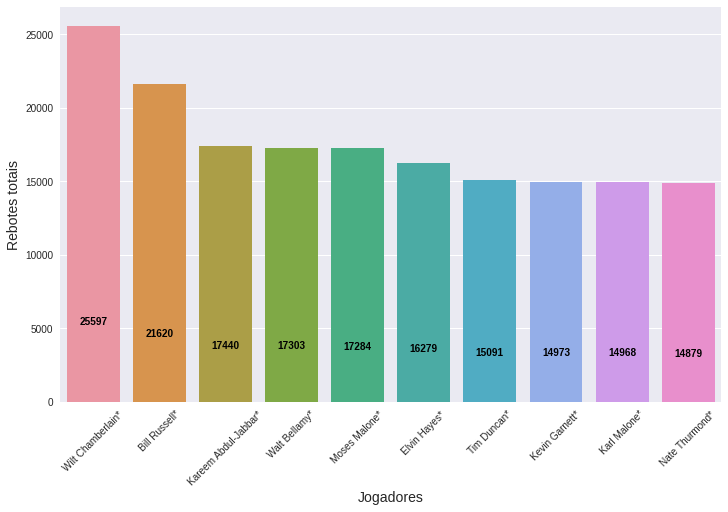

In [68]:
plot_grafico_barras(eixo_x=maiores_reboteiros_totais['Player'],
                    eixo_y=maiores_reboteiros_totais['TRB'],
                    y_label='Rebotes totais', casas_decimais=0)

Aqui devemos fazer uma consideração, pois tanto Wilt Chamberlain e Bill Russel não tiveram seus dados contabilizados de rebotes ofensivos nem defensivos, pois na época deles não havia essa divisão. Wilt Chamberlain é um dos maiores de todos os tempos. 2 vezes campeão da NBA e 4 vezes MVP da temporada regular, esse pivô detém até hoje o recorde de pontos em uma única partida, tendo feito 100 pontos.

## Bloqueio

In [69]:
maiores_bloqueadores = jogadores.sort_values(by=['BLK'], axis=0, ascending=False)
maiores_bloqueadores.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
1655,Hakeem Olajuwon*,26946.0,10724.0,20867.0,25.0,124.0,5423.0,7621.0,3058.0,2162.0,3830.0,13748.0,4034.0,9714.0
1155,Dikembe Mutombo*,12478.0,4438.0,8599.0,0.0,2.0,3602.0,5251.0,1316.0,523.0,3492.0,13374.0,4115.0,9259.0
2379,Kareem Abdul-Jabbar*,38387.0,15836.0,28289.0,1.0,18.0,6712.0,9304.0,5660.0,1160.0,3189.0,17440.0,2975.0,9394.0
2797,Mark Eaton,5216.0,2072.0,4524.0,0.0,2.0,1072.0,1653.0,840.0,368.0,3064.0,6939.0,1857.0,5082.0
3895,Tim Duncan*,26496.0,10255.0,20166.0,30.0,168.0,5896.0,8468.0,4225.0,1025.0,3020.0,15091.0,3859.0,11232.0
1004,David Robinson*,20790.0,7340.0,14121.0,25.0,100.0,6035.0,8201.0,2441.0,1388.0,2954.0,10497.0,3083.0,7414.0
3206,Patrick Ewing*,24815.0,9683.0,19116.0,19.0,125.0,5392.0,7289.0,2215.0,1136.0,2894.0,11607.0,2752.0,8855.0
3685,Shaquille O'Neal*,29428.0,11660.0,19993.0,1.0,22.0,6105.0,11590.0,3119.0,771.0,2820.0,13653.0,4375.0,9278.0
3691,Shawn Bradley,8657.0,3501.0,7662.0,5.0,51.0,1640.0,2321.0,688.0,621.0,2655.0,6517.0,2185.0,4332.0
3879,Theo Ratliff,7579.0,2890.0,5831.0,0.0,3.0,1799.0,2556.0,632.0,516.0,2631.0,6003.0,2050.0,3953.0


No handles with labels found to put in legend.


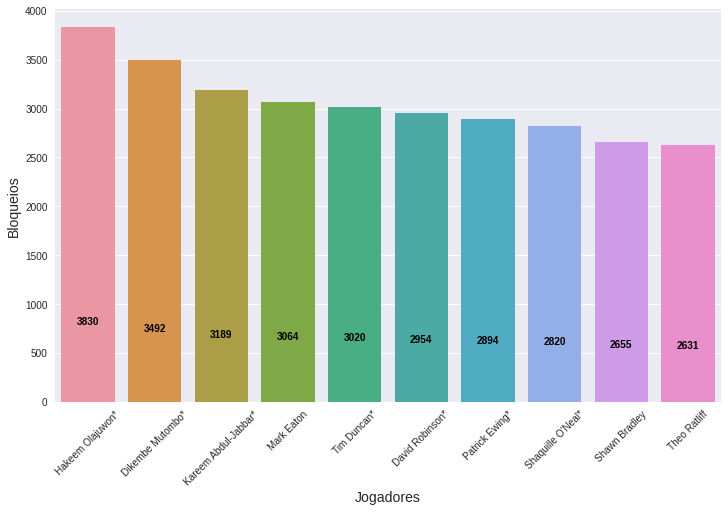

In [70]:
plot_grafico_barras(eixo_x=maiores_bloqueadores['Player'],
                    eixo_y=maiores_bloqueadores['BLK'],
                    y_label='Bloqueios', casas_decimais=0)

A lenda do Houston Rockets, Hakeem Olajuwon, bicampeão da NBA e uma vez MVP, é considerado um dos maiores defensores de todos os tempos. Junto com Michael Jordan e Giannis Antetokounmpo, é um dos que conseguiu ser MVP e jogador defensivo do ano na mesma temporada.

## Steal (roubos de bola)

In [71]:
maiores_roubadores = jogadores.sort_values(by=['STL'], axis=0, ascending=False)
maiores_roubadores.head(10)

,Player,PTS,2P,2PA,3P,3PA,FT,FTA,AST,STL,BLK,TRB,ORB,DRB
2239,John Stockton*,19711.0,6194.0,11455.0,845.0,2203.0,4788.0,5796.0,15806.0,3265.0,315.0,4051.0,966.0,3085.0
1930,Jason Kidd*,18992.0,4569.0,10701.0,2168.0,6178.0,3350.0,4284.0,13393.0,2944.0,496.0,9574.0,1926.0,7648.0
1508,Gary Payton*,23447.0,8187.0,16412.0,1186.0,3752.0,3515.0,4832.0,9629.0,2578.0,305.0,5603.0,1471.0,4132.0
2931,Michael Jordan*,32292.0,11611.0,22759.0,581.0,1778.0,7327.0,8772.0,5633.0,2514.0,893.0,6672.0,1668.0,5004.0
2875,Maurice Cheeks*,12984.0,5157.0,9763.0,56.0,220.0,2502.0,3140.0,7845.0,2434.0,304.0,3328.0,763.0,2565.0
790,Clyde Drexler*,23848.0,7932.0,15900.0,974.0,3011.0,5062.0,6404.0,6487.0,2343.0,764.0,7157.0,2767.0,4390.0
3645,Scottie Pippen*,18940.0,6442.0,12698.0,978.0,3002.0,3122.0,4437.0,6135.0,2307.0,947.0,7494.0,2068.0,5426.0
115,Alvin Robertson,11500.0,4383.0,8862.0,276.0,922.0,1906.0,2579.0,4192.0,2267.0,341.0,4335.0,1728.0,2607.0
721,Chris Paul,18829.0,5217.0,10289.0,1379.0,3730.0,4258.0,4892.0,9653.0,2233.0,133.0,4611.0,667.0,3944.0
101,Allen Iverson*,27457.0,8374.0,18665.0,1158.0,3704.0,7235.0,9256.0,6488.0,2213.0,185.0,3839.0,814.0,3025.0


No handles with labels found to put in legend.


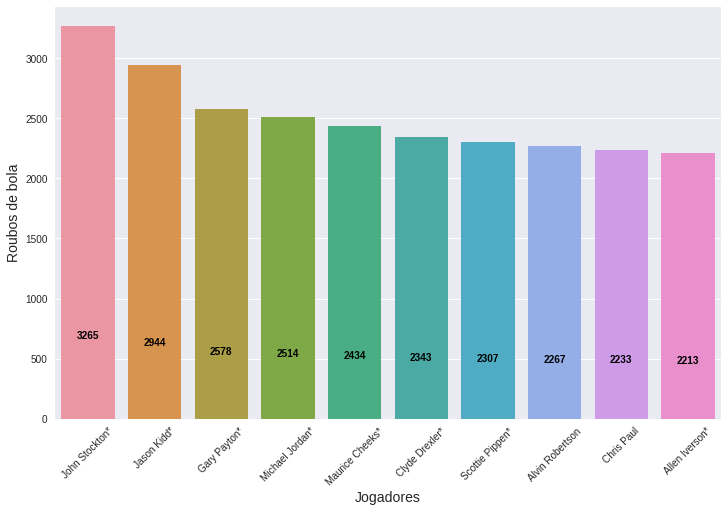

In [72]:
plot_grafico_barras(eixo_x=maiores_roubadores['Player'],
                    eixo_y=maiores_roubadores['STL'],
                    y_label='Roubos de bola', casas_decimais=0)

Novamente John Stockton aparece. Esse é considerado outros dos recordes inquebraveis, pois há um grande nível de dificuldade em roubos de bola na NBA em uma número tão expressivo.

## Conclusão para jogadores

Podemos concluir que os dados por mais que sejam um caminho, não podem ser definição de quem é melhor que quem. 

Pois vamos analisar Michael Jordan, para a grande maioria o maior de todos os tempos. Ele não lidera quesito nenhum. Porém Jordan jogou apenas 15 temporadas. Kobe Bryant, por exemplo, jogou 20 e tem apenas um pouco mais de mil pontos que Jordan. Kobe e Jordan foram dois gênios, isso já demonstra o porque Jordan mesmo com menos temporada que muitos está em alta e algun quesitos. 

Outro jogador que podemos falar é Earvin "Magic" Johnson Jr., que com "apenas" 13 temporadas é considerado pra muitos o maior armador de todos os tempos e um top cinco de todos os tempos.

Em exemplo defensivo podemos citar Dennis Rodman, um gênio quando falamos em rebotes, porém não tem um número tão expressivo em rebotes defensivos. Mas todos sabem da qualidade dele.

Esse número são apenas parâmetros para podermos analisar a NBA, ver e entender melhor. 